In [98]:
# Import the packages we will use in this project
# For mathematical computation
import pandas as pd
import numpy as np
import os # accessing directory structure

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

# Now we need to read in the data
df = pd.read_csv("E:/Engage/Resources/Dataset/cleanedagain7.csv")

In [66]:
# Now let's take a look at the data

df

,MyUnknownColumn,Make,Model,Variant,Complete Name,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,...,Seating_Capacity,Type,Airbags,Kerb_Weight,Front_Track,Rear_Track,Power,Torque,Wheelbase,Minimum_Turning_Radius
0,111.0,Maruti Suzuki,Celerio,Vxi Cng Mt,Maruti Suzuki Celerio Vxi Cng Mt,530000.0,998.0,3.0,4.0,FWD,...,5.0,Manual,2.0,810.0,1420.0,1410.0,85.13,22.29,2425.0,4.7
1,241.0,Maruti Suzuki,Dzire,Ldi,Maruti Suzuki Dzire Ldi,666622.0,1248.0,4.0,4.0,FWD,...,5.0,Manual,2.0,955.0,1490.0,1540.0,18.03,95.00,2450.0,4.8
2,337.0,Maruti Suzuki,Dzire,Vdi,Maruti Suzuki Dzire Vdi,757622.0,1248.0,4.0,4.0,FWD,...,5.0,Manual,2.0,967.0,1490.0,1540.0,25.00,95.00,2450.0,4.8
3,398.0,Maruti Suzuki,Dzire,Vdi Amt,Maruti Suzuki Dzire Vdi Amt,804622.0,1248.0,4.0,4.0,FWD,...,5.0,Automatic,2.0,967.0,1490.0,1540.0,45.00,95.00,2450.0,4.8
4,412.0,Maruti Suzuki,Dzire,Zdi,Maruti Suzuki Dzire Zdi,816622.0,1248.0,4.0,4.0,FWD,...,5.0,Manual,2.0,978.0,1490.0,1540.0,87.23,95.00,2450.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,16.0,Maruti Suzuki,Eeco,5,Maruti Suzuki Eeco 5,352136.0,1196.0,4.0,4.0,RWD,...,5.0,Manual,1.0,920.0,1280.0,1290.0,61.67,33.67,2350.0,4.5
182,29.0,Maruti Suzuki,Eeco,7,Maruti Suzuki Eeco 7,380573.0,1196.0,4.0,4.0,FWD,...,7.0,Manual,1.0,940.0,1280.0,1290.0,55.33,33.67,2350.0,4.5
183,33.0,Maruti Suzuki,Eeco,5,Maruti Suzuki Eeco 5,392967.0,1196.0,4.0,4.0,RWD,...,5.0,Manual,2.0,928.0,1280.0,1290.0,50.00,33.67,2350.0,4.5
184,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df.describe()

,MyUnknownColumn,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,...,Ground_Clearance,Seating_Capacity,Airbags,Kerb_Weight,Front_Track,Rear_Track,Power,Torque,Wheelbase,Minimum_Turning_Radius
count,184.000000,1.840000e+02,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,...,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,412.608696,8.576311e+05,1269.755435,3.733696,4.0,41.483696,1574.929348,3966.402174,1711.793478,4.815217,...,178.391304,5.119565,2.130435,1232.380435,1472.255435,1507.418478,36.959946,78.525489,2496.070652,4.967935
std,247.603705,3.166026e+05,208.256777,0.443231,0.0,8.440713,69.997505,249.823153,97.445632,0.389180,...,16.933142,0.475461,0.704667,423.083783,57.254536,70.633309,45.333011,96.646936,92.430156,0.248282
min,9.000000,2.948000e+05,796.000000,3.000000,4.0,27.000000,1475.000000,3445.000000,1475.000000,4.000000,...,160.000000,5.000000,1.000000,726.000000,1280.000000,1290.000000,2.210000,0.000000,2350.000000,4.500000
25%,203.750000,6.324590e+05,1197.000000,3.000000,4.0,35.000000,1515.000000,3840.000000,1695.000000,5.000000,...,165.000000,5.000000,2.000000,888.000000,1490.000000,1525.000000,14.910000,25.710000,2450.000000,4.800000
50%,423.500000,8.299560e+05,1199.000000,4.000000,4.0,37.000000,1560.000000,3995.000000,1735.000000,5.000000,...,170.000000,5.000000,2.000000,1001.500000,1490.000000,1540.000000,25.225000,34.550000,2498.000000,5.100000
75%,622.750000,1.035500e+06,1493.000000,4.000000,4.0,45.000000,1630.000000,3995.000000,1780.000000,5.000000,...,190.000000,5.000000,2.000000,1785.000000,1490.000000,1540.000000,45.620000,114.290000,2520.000000,5.200000
max,836.000000,1.634000e+06,1591.000000,4.000000,4.0,60.000000,1800.000000,4395.000000,1811.000000,5.000000,...,209.000000,7.000000,5.000000,1785.000000,1530.000000,1540.000000,516.000000,1141.330000,2740.000000,5.300000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MyUnknownColumn         184 non-null    float64
 1   Make                    184 non-null    object 
 2   Model                   184 non-null    object 
 3   Variant                 184 non-null    object 
 4   Complete Name           186 non-null    object 
 5   Ex-Showroom_Price       184 non-null    float64
 6   Displacement            184 non-null    float64
 7   Cylinders               184 non-null    float64
 8   Valves_Per_Cylinder     184 non-null    float64
 9   Drivetrain              184 non-null    object 
 10  Cylinder_Configuration  184 non-null    object 
 11  Emission_Norm           184 non-null    object 
 12  Fuel_Tank_Capacity      184 non-null    float64
 13  Fuel_Type               184 non-null    object 
 14  Body_Type               184 non-null    ob

In [69]:
# Data Types for our columns

print(df.dtypes)

MyUnknownColumn           float64
Make                       object
Model                      object
Variant                    object
Complete Name              object
Ex-Showroom_Price         float64
Displacement              float64
Cylinders                 float64
Valves_Per_Cylinder       float64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Body_Type                  object
Height                    float64
Length                    float64
Width                     float64
Doors                     float64
ARAI_Certified_Mileage    float64
Gears                     float64
Ground_Clearance          float64
Seating_Capacity          float64
Type                       object
Airbags                   float64
Kerb_Weight               float64
Front_Track               float64
Rear_Track                float64
Power                     float64
Torque        

In [70]:
# Find missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

MyUnknownColumn - 1%
Make - 1%
Model - 1%
Variant - 1%
Complete Name - 0%
Ex-Showroom_Price - 1%
Displacement - 1%
Cylinders - 1%
Valves_Per_Cylinder - 1%
Drivetrain - 1%
Cylinder_Configuration - 1%
Emission_Norm - 1%
Fuel_Tank_Capacity - 1%
Fuel_Type - 1%
Body_Type - 1%
Height - 1%
Length - 1%
Width - 1%
Doors - 1%
ARAI_Certified_Mileage - 1%
Gears - 1%
Ground_Clearance - 1%
Seating_Capacity - 1%
Type - 1%
Airbags - 1%
Kerb_Weight - 1%
Front_Track - 1%
Rear_Track - 1%
Power - 1%
Torque - 1%
Wheelbase - 1%
Minimum_Turning_Radius - 1%


In [71]:
# Duplicate data
df.drop_duplicates()

,MyUnknownColumn,Make,Model,Variant,Complete Name,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,...,Seating_Capacity,Type,Airbags,Kerb_Weight,Front_Track,Rear_Track,Power,Torque,Wheelbase,Minimum_Turning_Radius
0,111.0,Maruti Suzuki,Celerio,Vxi Cng Mt,Maruti Suzuki Celerio Vxi Cng Mt,530000.0,998.0,3.0,4.0,FWD,...,5.0,Manual,2.0,810.0,1420.0,1410.0,85.13,22.29,2425.0,4.7
1,241.0,Maruti Suzuki,Dzire,Ldi,Maruti Suzuki Dzire Ldi,666622.0,1248.0,4.0,4.0,FWD,...,5.0,Manual,2.0,955.0,1490.0,1540.0,18.03,95.00,2450.0,4.8
2,337.0,Maruti Suzuki,Dzire,Vdi,Maruti Suzuki Dzire Vdi,757622.0,1248.0,4.0,4.0,FWD,...,5.0,Manual,2.0,967.0,1490.0,1540.0,25.00,95.00,2450.0,4.8
3,398.0,Maruti Suzuki,Dzire,Vdi Amt,Maruti Suzuki Dzire Vdi Amt,804622.0,1248.0,4.0,4.0,FWD,...,5.0,Automatic,2.0,967.0,1490.0,1540.0,45.00,95.00,2450.0,4.8
4,412.0,Maruti Suzuki,Dzire,Zdi,Maruti Suzuki Dzire Zdi,816622.0,1248.0,4.0,4.0,FWD,...,5.0,Manual,2.0,978.0,1490.0,1540.0,87.23,95.00,2450.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,786.0,Hyundai,Creta,1.6,Hyundai Creta 1.6,1422937.0,1591.0,4.0,4.0,FWD,...,5.0,Manual,5.0,1180.0,1490.0,1540.0,17.40,31.13,2590.0,5.2
181,16.0,Maruti Suzuki,Eeco,5,Maruti Suzuki Eeco 5,352136.0,1196.0,4.0,4.0,RWD,...,5.0,Manual,1.0,920.0,1280.0,1290.0,61.67,33.67,2350.0,4.5
182,29.0,Maruti Suzuki,Eeco,7,Maruti Suzuki Eeco 7,380573.0,1196.0,4.0,4.0,FWD,...,7.0,Manual,1.0,940.0,1280.0,1290.0,55.33,33.67,2350.0,4.5
183,33.0,Maruti Suzuki,Eeco,5,Maruti Suzuki Eeco 5,392967.0,1196.0,4.0,4.0,RWD,...,5.0,Manual,2.0,928.0,1280.0,1290.0,50.00,33.67,2350.0,4.5


<AxesSubplot:>

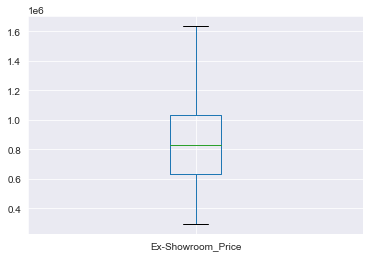

In [72]:
# Are there any Outliers?

df.boxplot(column=['Ex-Showroom_Price'])

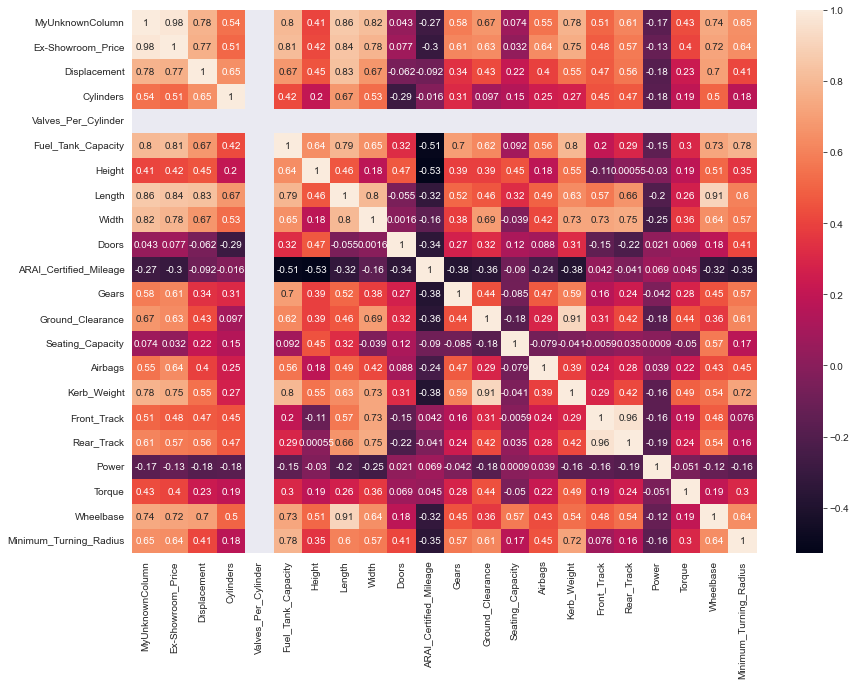

In [73]:
correlation_matrix = df.corr()
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

In [74]:
# Top 10 companies by gross ex-showroom price

MakePriceSum = df.groupby('Make')[["Ex-Showroom_Price"]].sum()
MakePriceSumSorted = MakePriceSum.sort_values('Ex-Showroom_Price', ascending = False)[:10]
MakePriceSumSorted = MakePriceSumSorted['Ex-Showroom_Price'].astype('int64') 
MakePriceSumSorted

Make
Maruti Suzuki    54993563
Hyundai          35532361
Tata             29378000
Kia              21429000
Honda            16471200
Name: Ex-Showroom_Price, dtype: int64

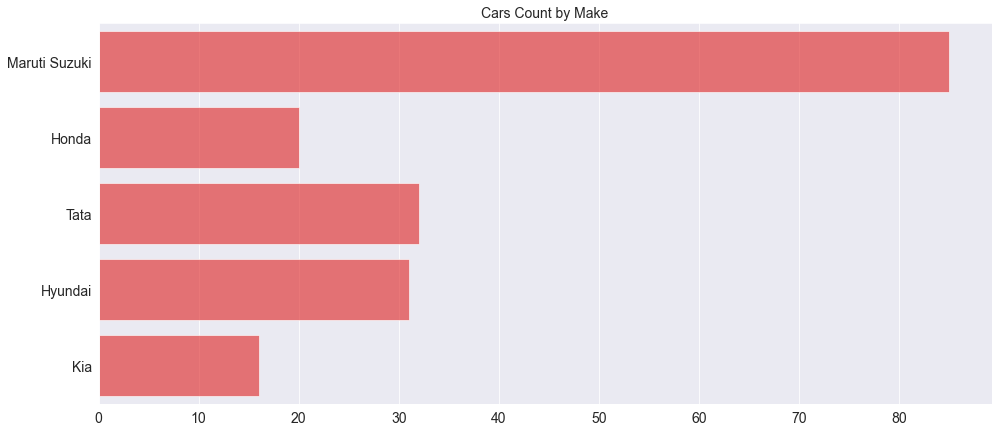

In [75]:
# Cars Count by Make

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Make',alpha=.6,color='Red')
plt.title('Cars Count by Make',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

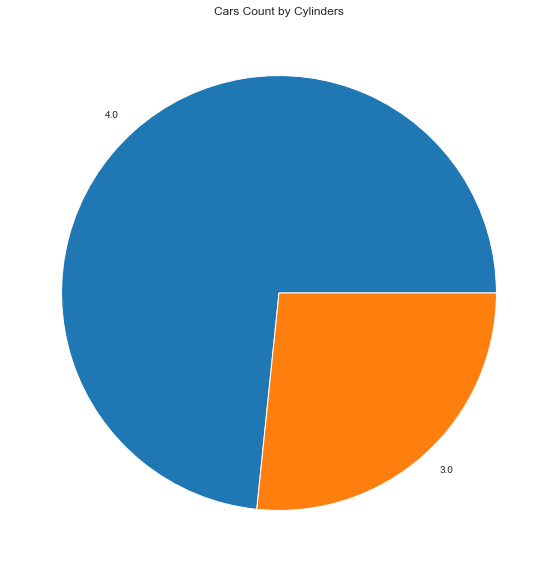

In [76]:
# Cars Count by Cylinders

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Cylinders.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Cylinders")
plt.show()

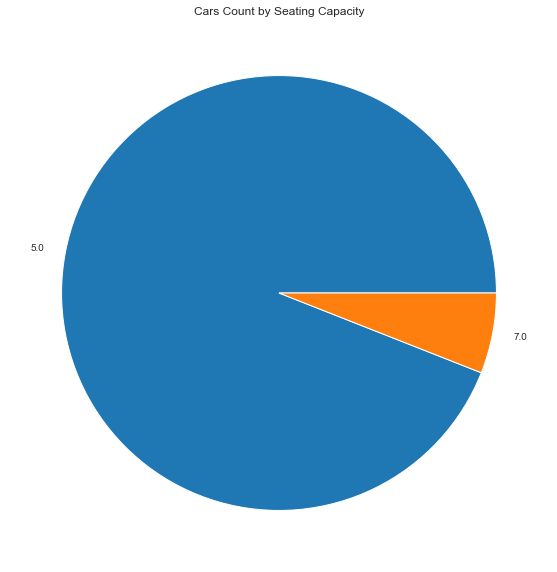

In [77]:
# Cars Count by Seating_Capacity

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Seating_Capacity.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Seating Capacity")
plt.show()

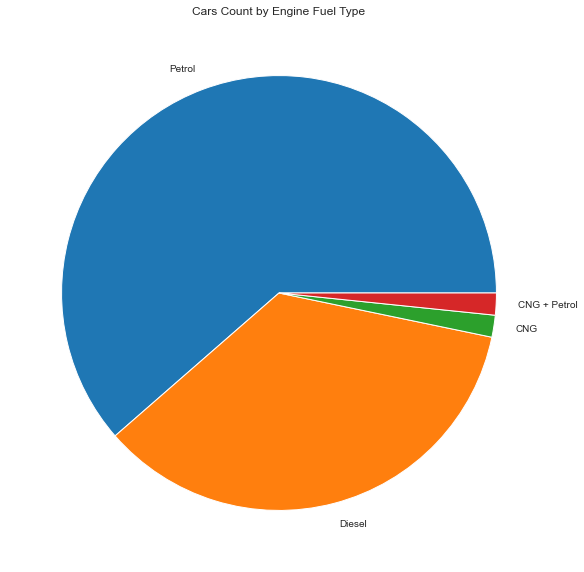

In [78]:
# Cars Count by Engine Fuel Type

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

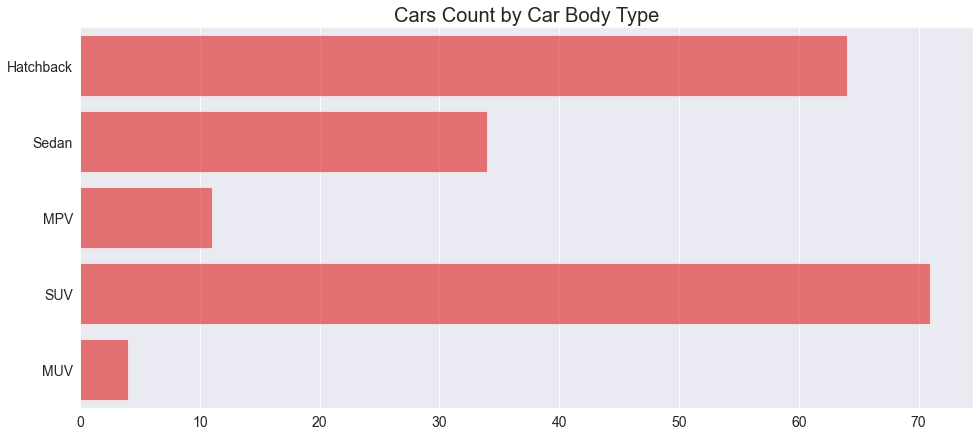

In [79]:
# Cars Count by Car Body Type

plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='Red')
plt.title('Cars Count by Car Body Type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

In [80]:
# SUV's Sedans and hatchbacks seems to be the dominating car types

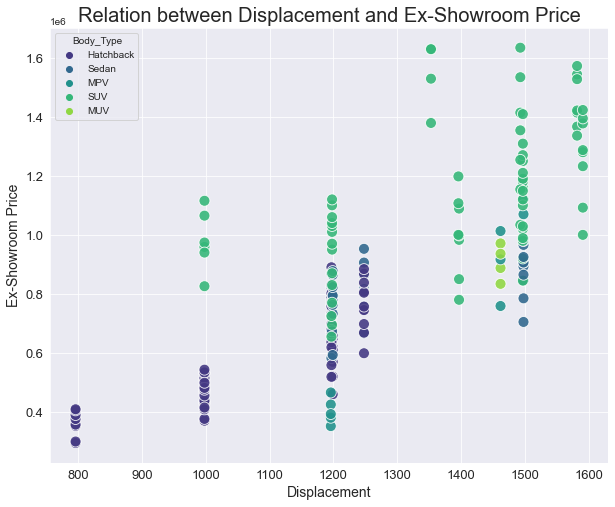

In [81]:
# Relationship between Displacement and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Displacement',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Displacement and Ex-Showroom Price',fontsize=20);

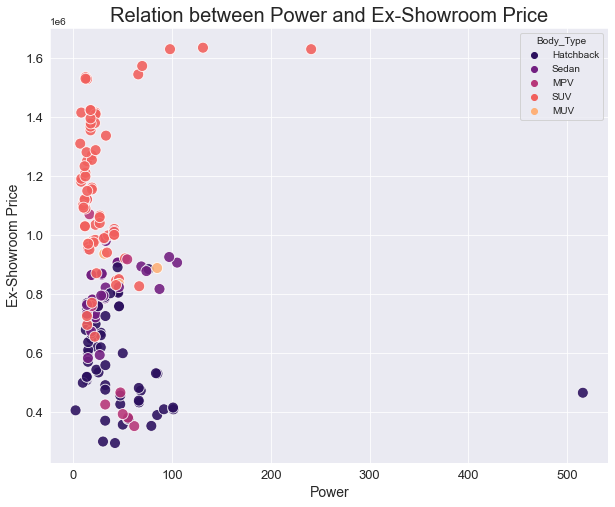

In [82]:
# Relationship between power and price

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='magma',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Power',fontsize=14)
plt.ylabel('Ex-Showroom Price',fontsize=14)
plt.title('Relation between Power and Ex-Showroom Price',fontsize=20);

In [83]:
# Horsepower of car is related to car price  
# Hatchbacks are the body type with the least horsepower and price

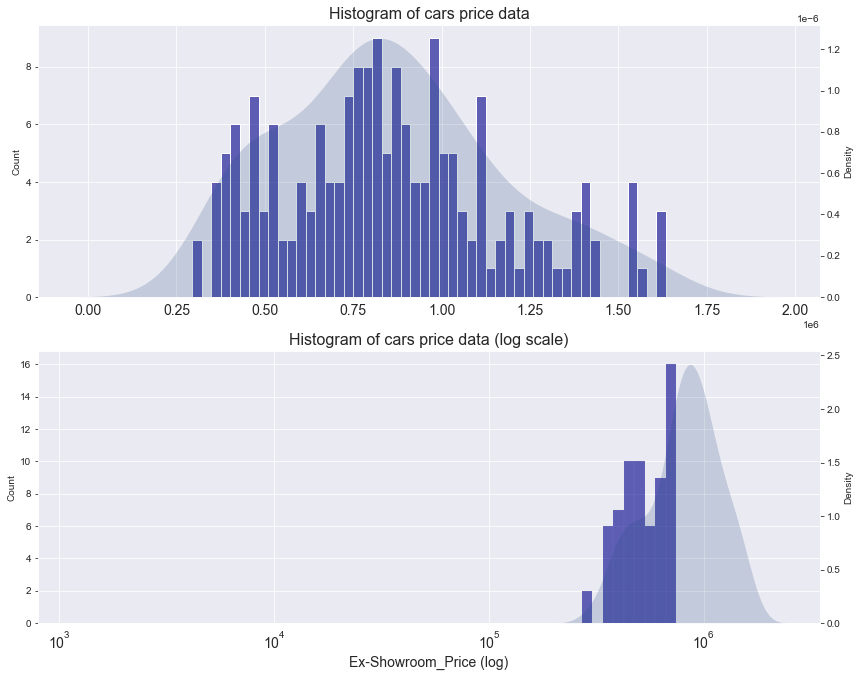

In [84]:
# Checking Ex-Showroom Price distribution using normal and log scales due to the huge difference in prices

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='Ex-Showroom_Price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='Ex-Showroom_Price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='Ex-Showroom_Price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Ex-Showroom_Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

In [85]:
# Variance in price can be checked by plotting a box plot

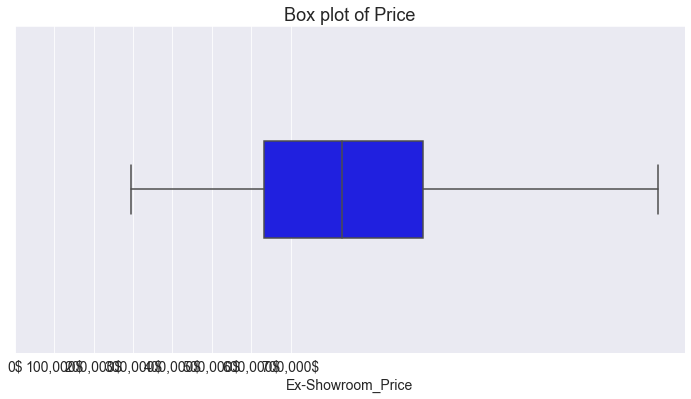

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price',width=.3,color='blue', hue= 'Fuel_Type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('Ex-Showroom_Price',fontsize=14);

In [87]:
# Outliers form a very different type(s) of cars or there are very different categories in the automotive market

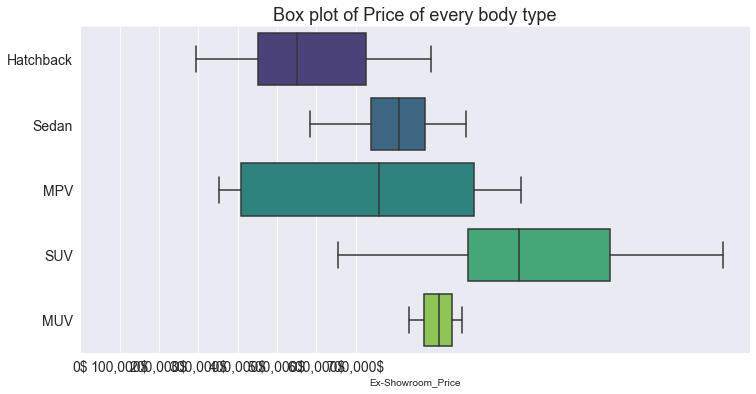

In [88]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Ex-Showroom_Price', y='Body_Type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

In [89]:
# Car body type affects the price

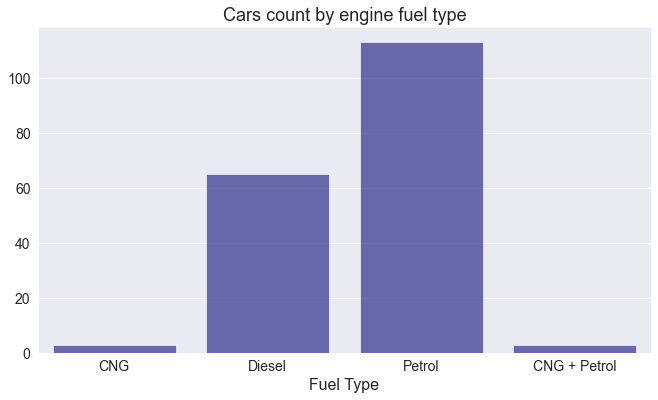

In [90]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='Fuel_Type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

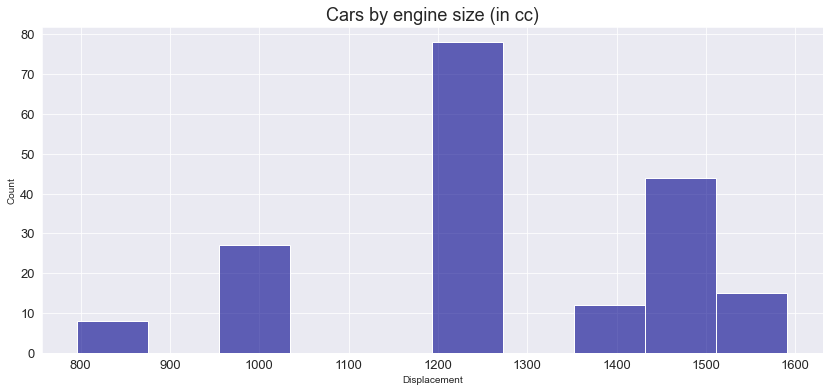

In [91]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in cc)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

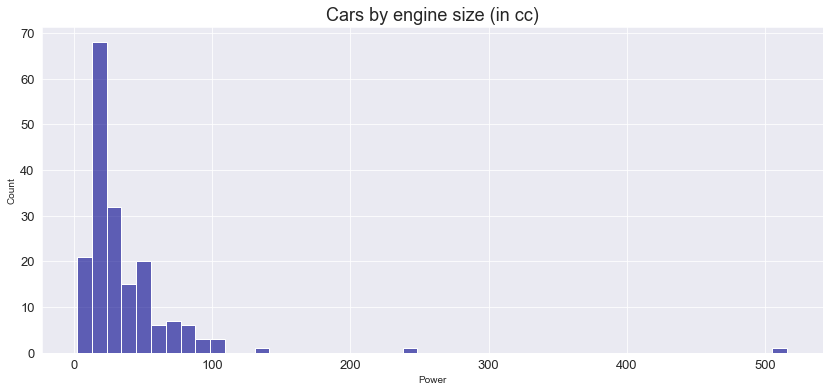

In [92]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in cc)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [29]:
df = pd.read_csv("C:/Users/aulee/OneDrive/Documents/cleanedagain6.csv")

In [93]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

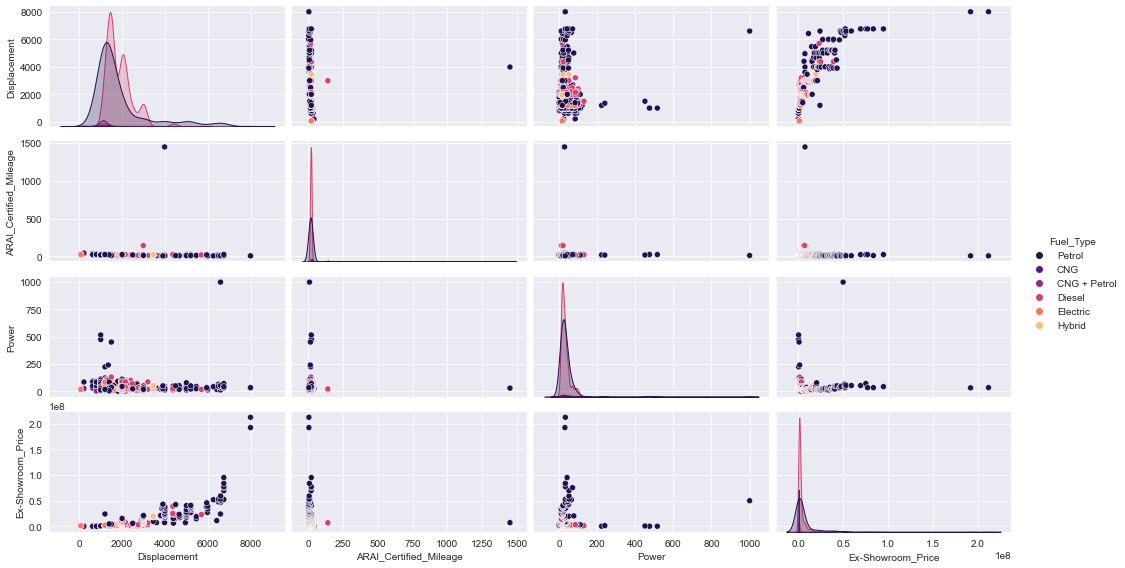

In [101]:
sns.pairplot(df,vars=[ 'Displacement', 'ARAI_Certified_Mileage', 'Power', 'Ex-Showroom_Price'], hue= 'Fuel_Type',
             palette=sns.color_palette('magma'),diag_kind='kde',height=2, aspect=1.8);

In [ ]:
fig = px.scatter_3d(df, x='Power', z='Ex-Showroom_Price', y='ARAI_Certified_Mileage',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

In [ ]:
df

,Unnamed: 0,Serial_Number,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power
0,0,1,Tata,Nano Genx,Xe,236447,624,2,2,RWD,In-line,BS IV,24.0,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,93.54
1,1,357,Bajaj,Qute (Re60),Qcar,263000,216,4,1,RWD,In-line,BS IV,45.0,Petrol,Hatchback,4,35.00,5,165.0,4,Manual,2,85.32
2,2,4,Tata,Nano Genx,Xm,272223,624,2,2,RWD,In-line,BS IV,24.0,Petrol,Hatchback,5,23.60,4,180.0,4,Manual,2,84.21
3,3,6,Datsun,Redi-Go,D,279650,799,3,4,FWD,In-line,BS IV,28.0,Petrol,Hatchback,5,25.17,5,185.0,5,Manual,2,35.75
4,4,881,Maruti Suzuki,Omni,5,282778,796,3,2,RWD,In-line,BS IV,35.0,Petrol,MPV,5,16.80,4,165.0,5,Manual,2,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,354,Rolls-Royce,Phantom Coupe,6.8,77312661,6749,12,4,RWD,V,BS IV,100.0,Petrol,Coupe,2,22.80,8,164.0,4,Automatic,5,33.68
1272,1272,880,Rolls-Royce,Drophead Coupe,Phantom,83755383,6749,12,4,RWD,V,BS IV,100.0,Petrol,Convertible,2,9.80,8,164.0,4,Automatic,5,33.71
1273,1273,1219,Rolls-Royce,Phantom,Sedan,95000000,6749,12,4,RWD,V,BS IV,100.0,Petrol,Sedan,4,23.00,8,164.0,5,Automatic,5,42.86
1274,1274,355,Bugatti,Chiron,W16,192142937,7993,16,4,RWD,W,BS VI,45.0,Petrol,Sports,2,5.95,7,165.0,2,Automatic,5,31.58


In [ ]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [ ]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

,Unnamed: 0,Serial_Number,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Fuel_Tank_Capacity,Fuel_Type,Body_Type,Doors,ARAI_Certified_Mileage,Gears,Ground_Clearance,Seating_Capacity,Type,Airbags,Power,cluster
493,493,924,Nissan,Sunny,Xl Diesel,912534,1461,4,4,FWD,In-line,BS IV,41.0,Diesel,Sedan,4,22.71,5,165.0,5,Manual,1,44.55,2
1122,1122,296,Bmw,X5,Xdrive30D Xline,8290000,2993,6,4,AWD,In-line,BS IV,45.0,Diesel,SUV,5,13.38,8,165.0,5,Automatic,6,37.50,8
702,702,963,Renault,Captur,Platine Petrol Dual Tone,1199999,1498,4,4,FWD,In-line,BS IV,50.0,Petrol,SUV,5,13.86,5,201.0,5,Manual,2,12.18,2
847,847,679,Mahindra,Xuv500,W9 At,1710118,2179,4,4,FWD,In-line,BS IV,70.0,Diesel,SUV,5,16.00,6,200.0,7,Automatic,2,45.09,2
1224,1224,320,Bmw,7-Series,M760Li Xdrive,24250000,6592,12,4,AWD,V,BS VI,78.0,Petrol,Sedan,4,7.96,8,152.0,4,Automatic,7,12.26,6


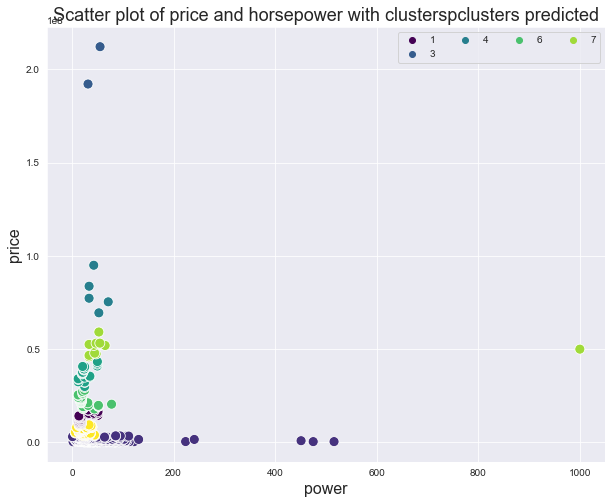

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='Ex-Showroom_Price', x='Power',s=100,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power', y='ARAI_Certified_Mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);
plt.xlim(0, 400)
plt.ylim(-5, 5)

NameError: name 'df' is not defined

<Figure size 576x432 with 0 Axes>

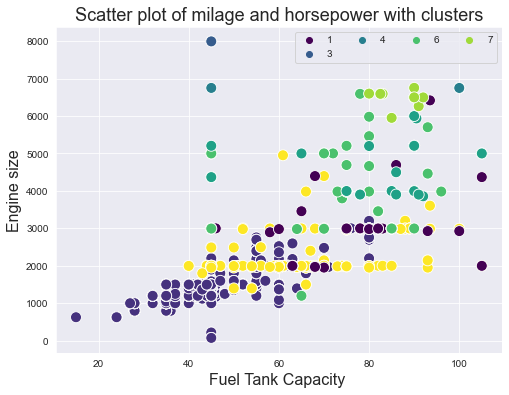

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Fuel_Tank_Capacity', y='Displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

In [ ]:
fig = px.scatter_3d(df, x='Power', z='Ex-Showroom_Price', y='ARAI_Certified_Mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()

In [ ]:
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

In [ ]:
fig = px.scatter_3d(df, x='Displacement', z='Ex-Showroom_Price', y='Fuel_Type',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

In [100]:
fig = px.scatter_3d(df, x='Length', z='Width', y='Height',color='Body_Type',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

(80.0, 1521.28)

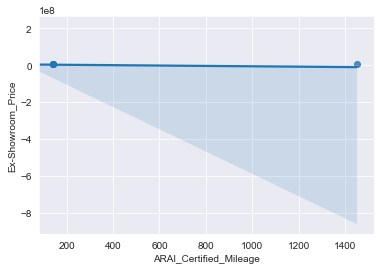

In [99]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)
sns.regplot(x = "ARAI_Certified_Mileage", 
            y = "Ex-Showroom_Price", 
            data = df)
plt.xlim(80)